In [1]:
import cPickle
import gzip
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
file = gzip.open('data/mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = cPickle.load(file)
file.close()

In [5]:
def vectorized_result(i):
    arr = np.zeros((10, 1))
    arr[i] = 1.0
    return arr

training_input = [np.reshape(x, (784, 1)) for x in training_data[0]]
training_output = [vectorized_result(y) for y in training_data[1]]
training_data = zip(training_input, training_output)

validation_input = [np.reshape(x, (784, 1)) for x in validation_data[0]]
validation_data = zip(validation_input, validation_data[1])

test_input = [np.reshape(x, (784, 1)) for x in test_data[0]]
test_data = zip(test_input, test_data[1])

In [6]:
NN_size = [784, 30, 10]
num_layers = len(NN_size)

In [7]:
biases = [np.random.randn(y, 1) for y in NN_size[1:]]
weights = [np.random.randn(y, x) for x, y in zip(NN_size[:-1], NN_size[1:])]

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

#Derivative
def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Feedforward function
def feedforward(a):
    for b, w in zip(biases, weights):
        a = sigmoid(np.dot(w, a) + b)
    return a

In [10]:
def backprop(x, y):
    global biases, weights
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    # feedforward
    activation = x
    activations = [x]  # list to store all the activations, layer by layer
    zs = []  # list to store all the z vectors, layer by layer
    for b, w in zip(biases, weights):
        z = np.dot(w, activation) + b
        zs.append(z)
        activation = sigmoid(z)
        activations.append(activation)
    # backward pass
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
    nabla_b[-1] = delta
    nabla_w[-1] = np.dot(delta, activations[-2].transpose())
    for l in xrange(2, num_layers):
        z = zs[-l]
        sp = sigmoid_prime(z)
        delta = np.dot(weights[-l + 1].transpose(), delta) * sp
        nabla_b[-l] = delta
        nabla_w[-l] = np.dot(delta, activations[-l - 1].transpose())
    return (nabla_b, nabla_w)

In [11]:
# Updating biases and weights by computing gradients
def update_mini_batch(mini_batch, eta):
    global biases, weights
    nabla_b = [np.zeros(b.shape) for b in biases]
    nabla_w = [np.zeros(w.shape) for w in weights]
    for x, y in mini_batch:
        delta_nabla_b, delta_nabla_w = backprop(x, y)
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
    weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(weights, nabla_w)]
    biases = [b - (eta / len(mini_batch)) * nb for b, nb in zip(biases, nabla_b)]

In [60]:
def SGD(training_data, epochs, mini_batch_size, eta, test_data=None):
    if test_data:
        n_test = len(test_data)
    else:
        n_test = 0
    n = len(training_data)
    for i in xrange(epochs):
        random.shuffle(training_data)
        mini_batches = [training_data[j:j + mini_batch_size] for j in xrange(0, n, mini_batch_size)]
        for mini_batch in mini_batches:
            update_mini_batch(mini_batch, eta)
        if test_data:
            print "Epoch {0}: {1} / {2}".format(
                i, evaluate(test_data), n_test)
        else:
            print "Epoch {0} complete".format(j)
            
def evaluate(test_data):
    val = random.randint(1,1000)
    a = test_data[val][0].reshape((28, 28))
    plt.imshow(a, cmap=cm.binary)
    plt.show()
    test_results = [(np.argmax(feedforward(x)), y) for (x, y) in test_data]
    print "The predicted value and actual value for the above image are: " + str(test_results[val][0]) + ", " +str(test_results[val][1])
    return sum(int(x == y) for (x, y) in test_results)


def cost_derivative(output_activations, y):
    return (output_activations - y)

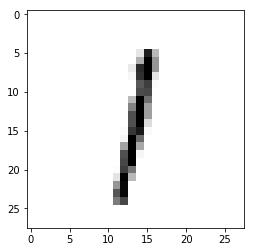

The predicted value and actual value for the above image are: 1, 1
Epoch 0: 9487 / 10000


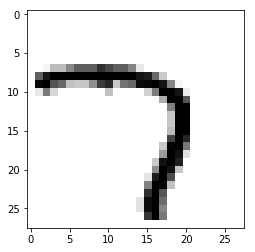

The predicted value and actual value for the above image are: 7, 7
Epoch 1: 9502 / 10000


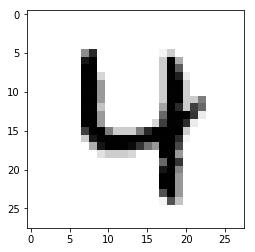

The predicted value and actual value for the above image are: 4, 4
Epoch 2: 9486 / 10000


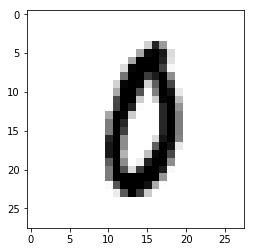

The predicted value and actual value for the above image are: 0, 0
Epoch 3: 9526 / 10000


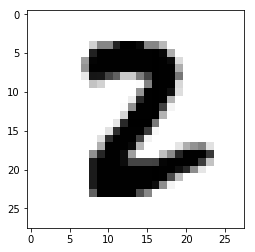

The predicted value and actual value for the above image are: 2, 2
Epoch 4: 9516 / 10000


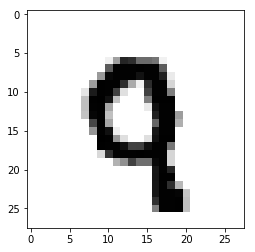

The predicted value and actual value for the above image are: 9, 9
Epoch 5: 9522 / 10000


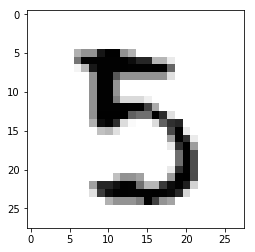

The predicted value and actual value for the above image are: 5, 5
Epoch 6: 9503 / 10000


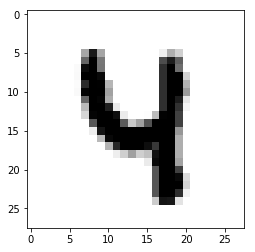

The predicted value and actual value for the above image are: 4, 4
Epoch 7: 9529 / 10000


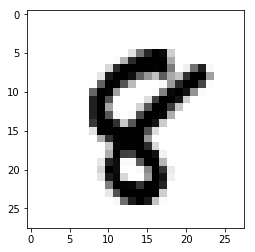

The predicted value and actual value for the above image are: 8, 8
Epoch 8: 9526 / 10000


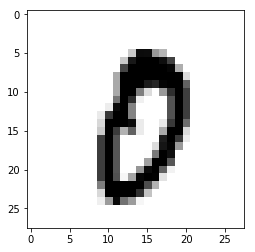

The predicted value and actual value for the above image are: 0, 0
Epoch 9: 9509 / 10000


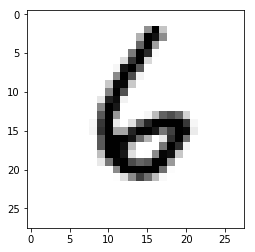

The predicted value and actual value for the above image are: 6, 6
Epoch 10: 9518 / 10000


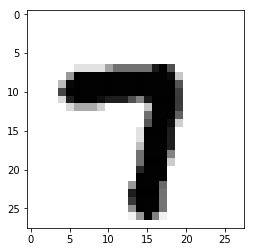

The predicted value and actual value for the above image are: 7, 7
Epoch 11: 9513 / 10000


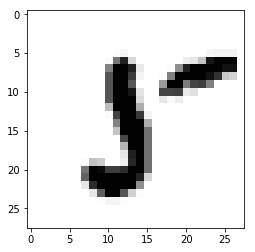

The predicted value and actual value for the above image are: 5, 5
Epoch 12: 9514 / 10000


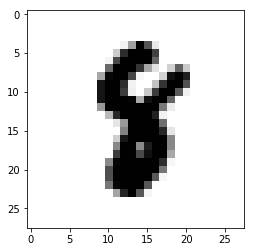

The predicted value and actual value for the above image are: 8, 8
Epoch 13: 9513 / 10000


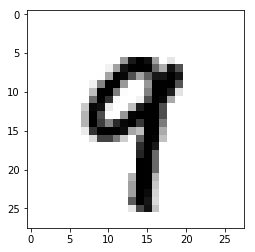

The predicted value and actual value for the above image are: 9, 9
Epoch 14: 9508 / 10000


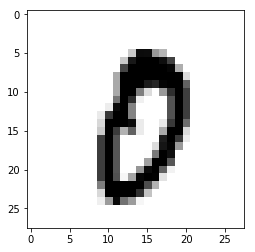

The predicted value and actual value for the above image are: 0, 0
Epoch 15: 9503 / 10000


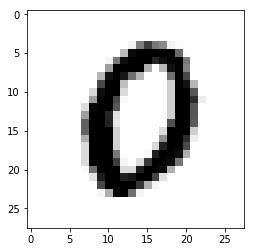

The predicted value and actual value for the above image are: 0, 0
Epoch 16: 9518 / 10000


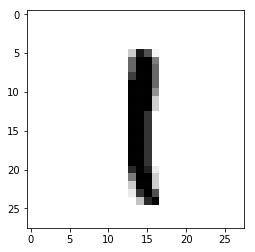

The predicted value and actual value for the above image are: 1, 1
Epoch 17: 9504 / 10000


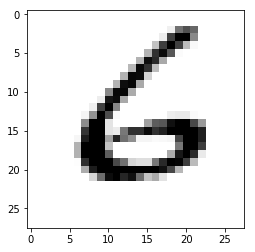

The predicted value and actual value for the above image are: 6, 6
Epoch 18: 9524 / 10000


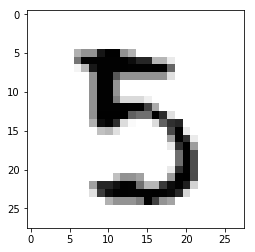

The predicted value and actual value for the above image are: 5, 5
Epoch 19: 9516 / 10000


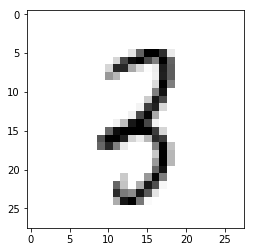

The predicted value and actual value for the above image are: 3, 3
Epoch 20: 9495 / 10000


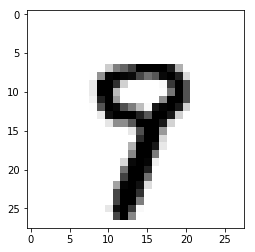

The predicted value and actual value for the above image are: 9, 9
Epoch 21: 9529 / 10000


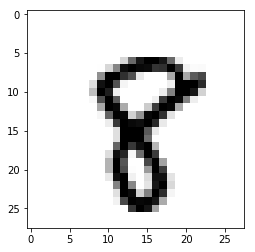

The predicted value and actual value for the above image are: 8, 8
Epoch 22: 9540 / 10000


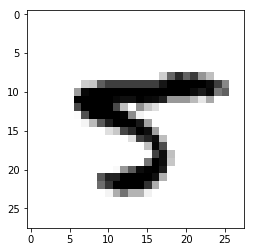

The predicted value and actual value for the above image are: 5, 5
Epoch 23: 9523 / 10000


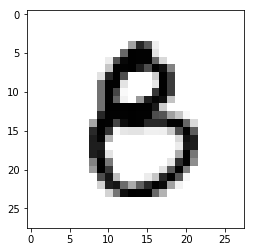

The predicted value and actual value for the above image are: 8, 8
Epoch 24: 9513 / 10000


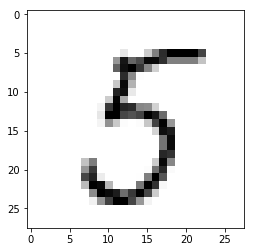

The predicted value and actual value for the above image are: 5, 5
Epoch 25: 9508 / 10000


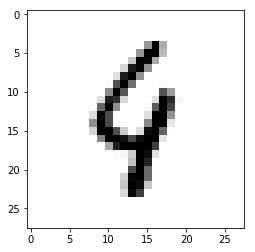

The predicted value and actual value for the above image are: 4, 4
Epoch 26: 9507 / 10000


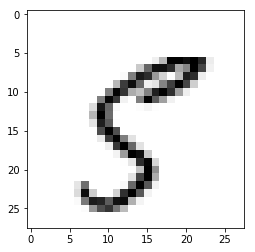

The predicted value and actual value for the above image are: 5, 5
Epoch 27: 9507 / 10000


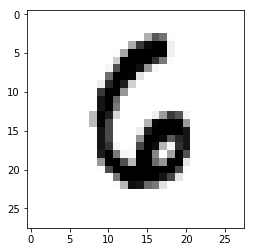

The predicted value and actual value for the above image are: 6, 6
Epoch 28: 9502 / 10000


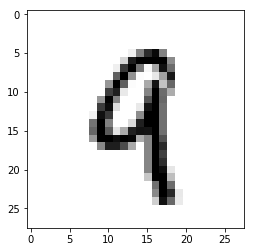

The predicted value and actual value for the above image are: 9, 9
Epoch 29: 9508 / 10000


In [61]:
SGD(training_data, 30, 10, 3.0, test_data=test_data)